In [20]:
# Import Dependencies
%matplotlib inline
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import statsmodels.formula.api as sm
from statsmodels.graphics.regressionplots import abline_plot
from sklearn.linear_model import LinearRegression

plt.rc("figure", figsize=(16, 8))
plt.rc("font", size=14)

In [4]:
# Load the dataset
olympic_df = pd.read_csv('Machine_Learning_datasetv2.csv')
olympic_df = olympic_df.drop(['Unnamed: 0'], axis=1)

In [37]:
# Sort for Winter Olympics Results
winter_olympic_df = olympic_df[olympic_df['Season'] == 'Winter']
winter_olympic_df = winter_olympic_df.rename(columns={'GDP per capita': 'gdp_per_capita'})
winter_olympic_df['lnPopulation'] = np.log2(winter_olympic_df['Population'])
winter_olympic_df

,NOC,Year,Season,Host,athlete_count_x,Population,gdp_per_capita,Gold,Silver,Bronze,country_medal_total,athlete_count_y,olympic_total,medal_share,athlete_share,lnPopulation
1611,ALB,2006,Winter,0,3,2992547.0,7347.33,0.0,0.0,0.0,0.0,3315,252.0,0.000000,0.000905,21.512942
1612,ALG,2006,Winter,0,3,33641007.0,10385.78,0.0,0.0,0.0,0.0,3315,252.0,0.000000,0.000905,25.003718
1613,ARG,2006,Winter,0,17,39289876.0,16490.47,0.0,0.0,0.0,0.0,3315,252.0,0.000000,0.005128,25.227654
1614,ARM,2006,Winter,0,8,2958301.0,8798.75,0.0,0.0,0.0,0.0,3315,252.0,0.000000,0.002413,21.496337
1615,AUS,2006,Winter,0,40,20697900.0,42650.99,1.0,0.0,1.0,2.0,3315,252.0,0.007937,0.012066,24.302981
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2498,TUR,2002,Winter,0,5,65145357.0,11753.95,0.0,0.0,0.0,0.0,3116,234.0,0.000000,0.001605,25.957159
2499,UKR,2002,Winter,0,79,48202470.0,6262.98,0.0,0.0,0.0,0.0,3116,234.0,0.000000,0.025353,25.522604
2500,USA,2002,Winter,1,232,287625193.0,46266.30,10.0,13.0,11.0,34.0,3116,234.0,0.145299,0.074454,28.099615
2501,UZB,2002,Winter,0,6,25271850.0,4777.29,0.0,0.0,0.0,0.0,3116,234.0,0.000000,0.001926,24.591028


In [27]:
# Athlete Count Linear Regression model
model_ac = sm.ols(formula='medal_share ~ athlete_share', data=winter_olympic_df).fit()
model_ac.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            medal_share   R-squared:                       0.550
Model:                            OLS   Adj. R-squared:                  0.549
Method:                 Least Squares   F-statistic:                     865.4
Date:                Fri, 25 Feb 2022   Prob (F-statistic):          6.08e-125
Time:                        19:34:58   Log-Likelihood:                 1534.7
No. Observations:                 711   AIC:                            -3065.
Df Residuals:                     709   BIC:                            -3056.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
=================================================================================
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept        -0.0059      0.001     -4.238      0.000      -0.009      -0.003
athlete_share     1.2801      0.044     29.417      0.000       1.195       1.366
==============================================================================
Omnibus:                      234.593   Durbin-Watson:                   1.866
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1961.250
Skew:                           1.237   Prob(JB):                         0.00
Kurtosis:                      10.751   Cond. No.                         41.5
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

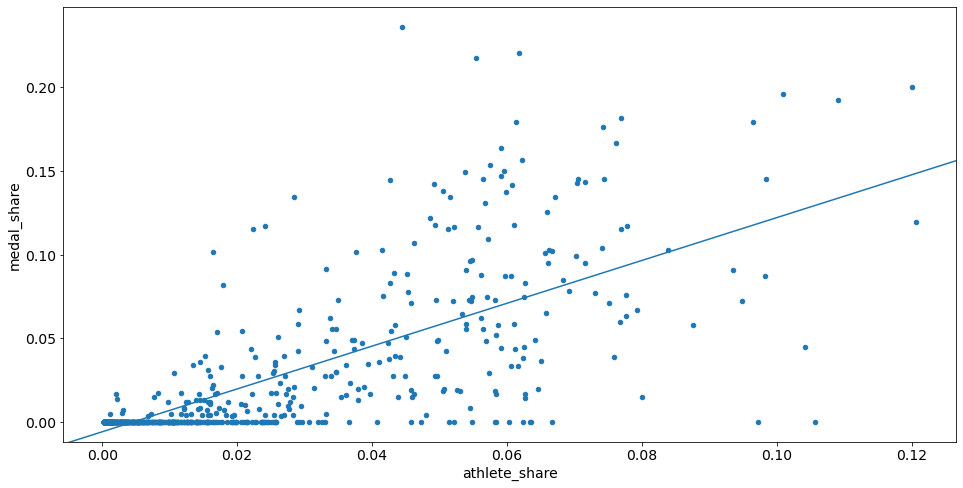

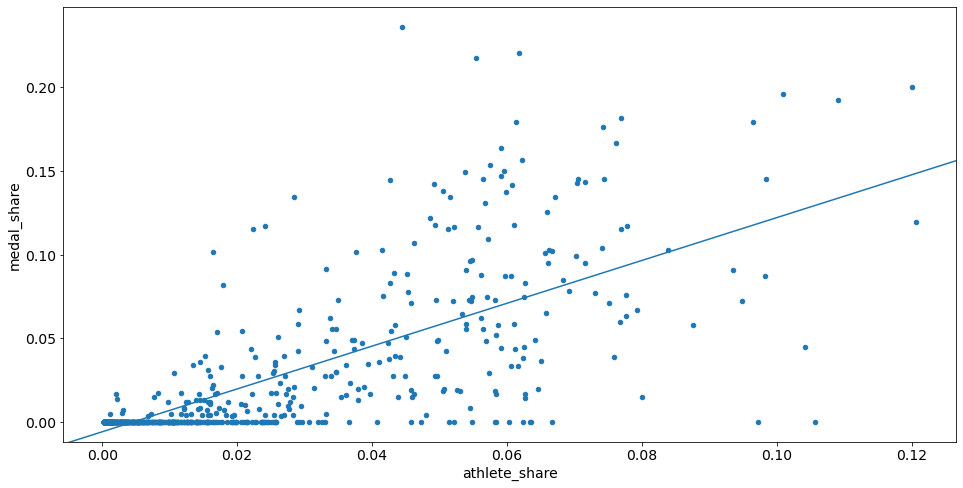

In [31]:
ax = winter_olympic_df.plot(x='athlete_share', y='medal_share', kind='scatter')
abline_plot(model_results=model_ac, ax=ax)

In [35]:
y_pred = model_ac2.predict(winter_olympic_df['athlete_share'])
y_pred
# print('Predicted response:', y_pred, sep='\n')

1611   -0.004752
1612   -0.004752
1613    0.000655
1614   -0.002821
1615    0.009537
          ...   
2498   -0.003856
2499    0.026545
2500    0.089402
2501   -0.003445
2502   -0.004267
Length: 711, dtype: float64

In [32]:
# GDP Linear Regression model
model_gdp = sm.ols(formula='medal_share ~ gdp_per_capita', data=winter_olympic_df).fit()
model_gdp.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            medal_share   R-squared:                       0.130
Model:                            OLS   Adj. R-squared:                  0.129
Method:                 Least Squares   F-statistic:                     105.8
Date:                Fri, 25 Feb 2022   Prob (F-statistic):           3.15e-23
Time:                        19:36:20   Log-Likelihood:                 1300.6
No. Observations:                 711   AIC:                            -2597.
Df Residuals:                     709   BIC:                            -2588.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept      -2.977e-05      0.003     -0.012      0.991      -0.005       0.005
gdp_per_capita  1.175e-06   1.14e-07     10.287      0.000    9.51e-07     1.4e-06
==============================================================================
Omnibus:                      369.327   Durbin-Watson:                   1.898
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1977.434
Skew:                           2.393   Prob(JB):                         0.00
Kurtosis:                       9.621   Cond. No.                     3.81e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 3.81e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

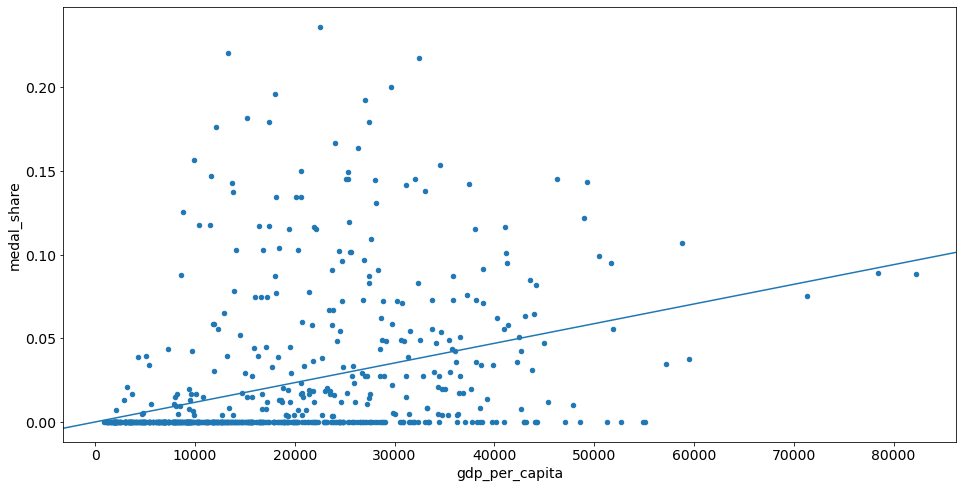

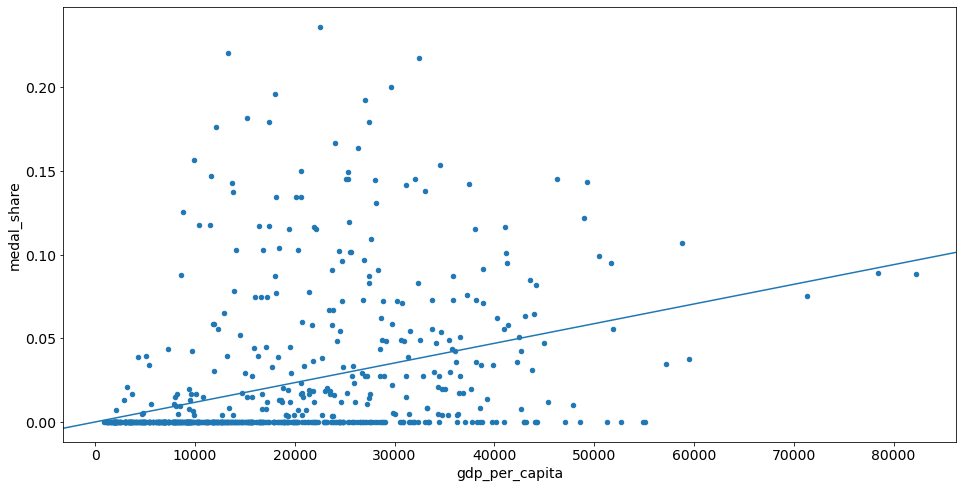

In [34]:
ax = winter_olympic_df.plot(x='gdp_per_capita', y='medal_share', kind='scatter')
abline_plot(model_results=model_gdp, ax=ax)

In [36]:
y_pred = model_gdp.predict(winter_olympic_df['gdp_per_capita'])
y_pred
# print('Predicted response:', y_pred, sep='\n')

1611    0.008606
1612    0.012177
1613    0.019353
1614    0.010312
1615    0.050101
          ...   
2498    0.013786
2499    0.007332
2500    0.054351
2501    0.005585
2502    0.015081
Length: 711, dtype: float64

In [39]:
# Population Linear Regression model
model_pop = sm.ols(formula='medal_share ~ lnPopulation', data=winter_olympic_df).fit()
model_pop.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            medal_share   R-squared:                       0.028
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     20.06
Date:                Fri, 25 Feb 2022   Prob (F-statistic):           8.76e-06
Time:                        19:41:59   Log-Likelihood:                 1261.0
No. Observations:                 711   AIC:                            -2518.
Df Residuals:                     709   BIC:                            -2509.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept       -0.0450      0.015     -3.032      0.003      -0.074      -0.016
lnPopulation     0.0028      0.001      4.479      0.000       0.002       0.004
==============================================================================
Omnibus:                      360.199   Durbin-Watson:                   2.017
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1677.067
Skew:                           2.395   Prob(JB):                         0.00
Kurtosis:                       8.803   Cond. No.                         228.
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

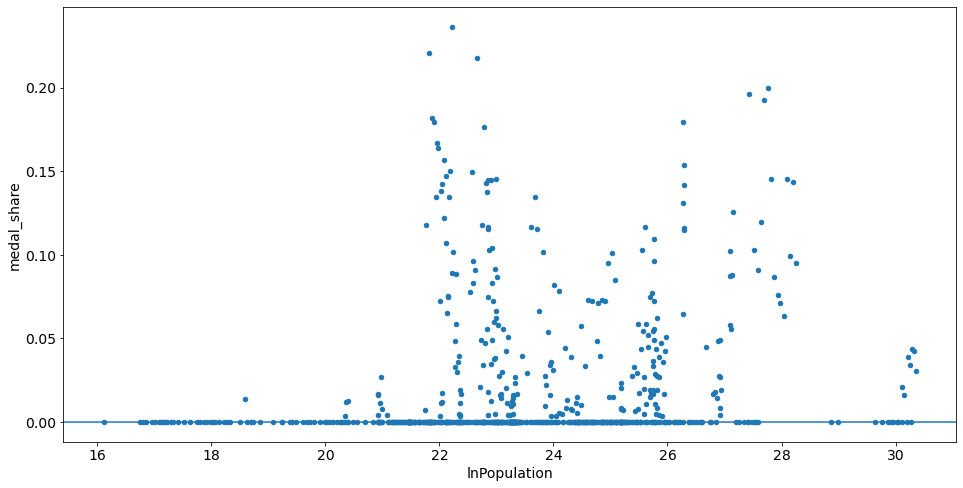

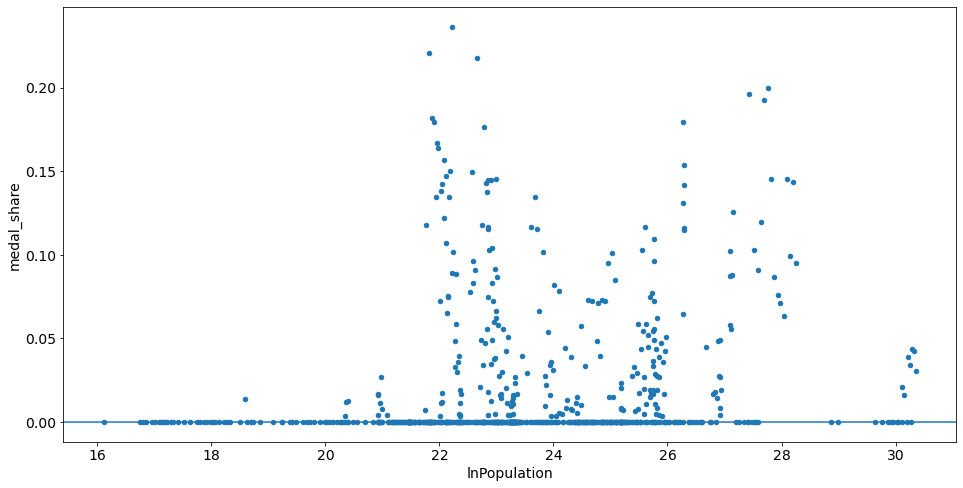

In [40]:
ax = winter_olympic_df.plot(x='lnPopulation', y='medal_share', kind='scatter')
abline_plot(model_results=model_gdp, ax=ax)

In [42]:
y_pred = model_pop.predict(winter_olympic_df['lnPopulation'])
y_pred
# print('Predicted response:', y_pred, sep='\n')

1611    0.015334
1612    0.025116
1613    0.025744
1614    0.015287
1615    0.023153
          ...   
2498    0.027788
2499    0.026570
2500    0.033792
2501    0.023960
2502    0.023932
Length: 711, dtype: float64

In [53]:
# Multiple Linear Regression model
model_mlr = sm.ols(formula='medal_share ~ gdp_per_capita + athlete_share + Host + lnPopulation', data=winter_olympic_df).fit()
model_mlr.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:            medal_share   R-squared:                       0.573
Model:                            OLS   Adj. R-squared:                  0.571
Method:                 Least Squares   F-statistic:                     236.8
Date:                Sat, 26 Feb 2022   Prob (F-statistic):          7.43e-129
Time:                        12:16:01   Log-Likelihood:                 1553.6
No. Observations:                 711   AIC:                            -3097.
Df Residuals:                     706   BIC:                            -3074.
Df Model:                           4                                         
Covariance Type:            nonrobust                                         
==================================================================================
                     coef    std err          t      P>|t|      [0.025      0.975]
----------------------------------------------------------------------------------
Intercept          0.0179      0.011      1.688      0.092      -0.003       0.039
gdp_per_capita  3.674e-07   8.66e-08      4.244      0.000    1.97e-07    5.37e-07
athlete_share      1.2170      0.051     23.939      0.000       1.117       1.317
Host               0.0214      0.008      2.740      0.006       0.006       0.037
lnPopulation      -0.0013      0.000     -2.794      0.005      -0.002      -0.000
==============================================================================
Omnibus:                      257.193   Durbin-Watson:                   1.872
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2117.107
Skew:                           1.390   Prob(JB):                         0.00
Kurtosis:                      10.983   Cond. No.                     1.10e+06
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.1e+06. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
# y_pred = model_mlr.predict(winter_olympic_df['gdp_per_capita', 'athlete_share', 'Host', 'lnPopulation'])
# y_pred
# # print('Predicted response:', y_pred, sep='\n')